In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,\
    Dropout, Dense, Input, concatenate, ZeroPadding2D,  \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, add, Activation, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC, Precision, Recall, FalseNegatives, FalsePositives,TrueNegatives,TruePositives, CategoricalCrossentropy
from tensorflow.keras.models import load_model

#from scikitplot.metrics import plot_confusion_matrix, plot_roc

import math  


import os
import numpy as np                                                                                                                                                                                                                                                                                                                                    
import matplotlib.pyplot as plt
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from distutils.dir_util import copy_tree

In [ ]:
import cv2
import itertools
import os
import random
import shutil
import glob

In [ ]:
copy_tree('/content/drive/MyDrive/Covid-19_modified/Sparse1/0','/content/Sparse1/0')

['/content/Sparse1/0/sp1_1.png',
 '/content/Sparse1/0/sp1_2.png',
 '/content/Sparse1/0/sp1_4.png',
 '/content/Sparse1/0/sp1_3.png',
 '/content/Sparse1/0/sp1_7.png',
 '/content/Sparse1/0/sp1_6.png',
 '/content/Sparse1/0/sp1_5.png',
 '/content/Sparse1/0/sp1_11.png',
 '/content/Sparse1/0/sp1_9.png',
 '/content/Sparse1/0/sp1_8.png',
 '/content/Sparse1/0/sp1_10.png',
 '/content/Sparse1/0/sp1_12.png',
 '/content/Sparse1/0/sp1_13.png',
 '/content/Sparse1/0/sp1_14.png',
 '/content/Sparse1/0/sp1_16.png',
 '/content/Sparse1/0/sp1_15.png',
 '/content/Sparse1/0/sp1_17.png',
 '/content/Sparse1/0/sp1_18.png',
 '/content/Sparse1/0/sp1_19.png',
 '/content/Sparse1/0/sp1_21.png',
 '/content/Sparse1/0/sp1_20.png',
 '/content/Sparse1/0/sp1_22.png',
 '/content/Sparse1/0/sp1_23.png',
 '/content/Sparse1/0/sp1_24.png',
 '/content/Sparse1/0/sp1_25.png',
 '/content/Sparse1/0/sp1_26.png',
 '/content/Sparse1/0/sp1_28.png',
 '/content/Sparse1/0/sp1_27.png',
 '/content/Sparse1/0/sp1_30.png',
 '/content/Sparse1/0/sp

In [ ]:
copy_tree('/content/drive/MyDrive/Covid-19_modified/Sparse1/1','/content/Sparse1/1')

['/content/Sparse1/1/sp1_1.png',
 '/content/Sparse1/1/sp1_2.png',
 '/content/Sparse1/1/sp1_3.png',
 '/content/Sparse1/1/sp1_4.png',
 '/content/Sparse1/1/sp1_7.png',
 '/content/Sparse1/1/sp1_6.png',
 '/content/Sparse1/1/sp1_5.png',
 '/content/Sparse1/1/sp1_9.png',
 '/content/Sparse1/1/sp1_8.png',
 '/content/Sparse1/1/sp1_13.png',
 '/content/Sparse1/1/sp1_10.png',
 '/content/Sparse1/1/sp1_12.png',
 '/content/Sparse1/1/sp1_11.png',
 '/content/Sparse1/1/sp1_16.png',
 '/content/Sparse1/1/sp1_14.png',
 '/content/Sparse1/1/sp1_15.png',
 '/content/Sparse1/1/sp1_17.png',
 '/content/Sparse1/1/sp1_18.png',
 '/content/Sparse1/1/sp1_19.png',
 '/content/Sparse1/1/sp1_20.png',
 '/content/Sparse1/1/sp1_22.png',
 '/content/Sparse1/1/sp1_21.png',
 '/content/Sparse1/1/sp1_23.png',
 '/content/Sparse1/1/sp1_24.png',
 '/content/Sparse1/1/sp1_26.png',
 '/content/Sparse1/1/sp1_25.png',
 '/content/Sparse1/1/sp1_28.png',
 '/content/Sparse1/1/sp1_27.png',
 '/content/Sparse1/1/sp1_31.png',
 '/content/Sparse1/1/sp

In [ ]:
original_data_path = "/content/Sparse1"
train_pct = 0.7
test_pct = 0.3
if os.path.isdir("/content/Sparse1/train/0") is False:
    # create folders for the sets
    os.mkdir("/content/Sparse1/train")
    os.mkdir("/content/Sparse1/test")
    for i in range(0, 2):
        # path to inputs with different classes
        num_folder_path = f'{original_data_path}/{i}' 
        num_files_in_folder = len(os.listdir(num_folder_path))
        train_size1 = int(num_files_in_folder * train_pct)
        test_size1 = int(num_files_in_folder * test_pct)
        train_size = train_size1
        test_size = test_size1
        os.mkdir(f'/content/Sparse1/train/{i}')
        os.mkdir(f'/content/Sparse1/test/{i}')
        test_samples = random.sample(os.listdir(num_folder_path), test_size)
        for file_name in test_samples:
            shutil.move((f"/content/Sparse1/{i}/{file_name}"), f'/content/Sparse1/test/{i}')
        train_samples = random.sample(os.listdir(num_folder_path), train_size)
        for file_name in train_samples:
            shutil.move((f"/content/Sparse1/{i}/{file_name}"), f'/content/Sparse1/train/{i}')

In [ ]:
train_dir = '/content/Sparse1/train'
test_dir = '/content/Sparse1/test'

num_of_train = 0
num_of_validate = 0
num_of_test = 0
for label in os.listdir(train_dir):
    for i in os.listdir(os.path.join(train_dir,label)):
        num_of_train+=1


for label in os.listdir(test_dir):
    for i in os.listdir(os.path.join(test_dir,label)):
        num_of_test+=1

print(f"Total training sample:{num_of_train}\n",f"Total test sample:{num_of_test}")

Total training sample:212
 Total test sample:91


In [ ]:
IMG_SIZE = (256,256)
batch_size = 10
epoch = 100
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)  

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMG_SIZE,
                                                           )
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              shuffle=True,
                                                              target_size=IMG_SIZE,
                                                              )

Found 212 images belonging to 2 classes.
Found 91 images belonging to 2 classes.


In [ ]:
sample_test_images, labels = next(test_data_gen)
print(labels[0:10])
sample_test_images.shape
labels.shape

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


(10, 2)

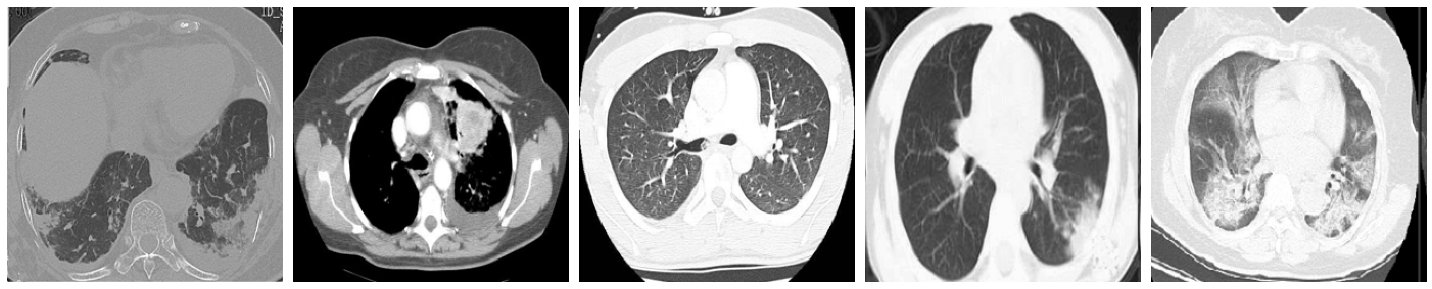

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
def plotImages(images_arr,labels):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    print(labels)
    

plotImages(sample_test_images[:5],labels[:5])

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
from tensorflow import keras

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
model=tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=(256,256,3), weights='imagenet', include_top=False)

In [ ]:
for layer in model.layers:
  layer.trainable = False
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization,Dropout
flat1 = Flatten()(model.layers[-1].output)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(flat1)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(x)
output = Dense(2,activation='sigmoid')(x)
# define new model
model = Model(inputs=model.inputs, outputs=output)  
def decay(epoch, steps=10):
    initial_lrate = 0.0001
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',AUC(),Precision(),Recall()])
checkpoint = ModelCheckpoint("covid-19_large!.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, mode='auto')
callback = [checkpoint]
hist = model.fit_generator(generator=train_data_gen, validation_data= test_data_gen, epochs=30,callbacks=callback)

In [ ]:
model_metrics = model.evaluate(test_data_gen)
f1_score = 2*( (model_metrics[3]*model_metrics[4]) / (model_metrics[3]+model_metrics[4]) )

print(f"Accuracy on test set: {round(model_metrics[1]*100,2)}%")
print(f"ROC(Receiver Operation Characteristic) AUC(Area Under Curve): {model_metrics[2]}")
print(f"Precision: {round(model_metrics[3]*100,2)}%")
print(f"Recall: {round(model_metrics[4]*100,2)}%")
print(f"F1-score: {f1_score}")

10/10 [==============================] - 1s 74ms/step - loss: 1.9313 - accuracy: 0.9011 - auc: 0.9436 - precision: 0.9011 - recall: 0.9011
Accuracy on test set: 90.11%
ROC(Receiver Operation Characteristic) AUC(Area Under Curve): 0.9436057209968567
Precision: 90.11%
Recall: 90.11%
F1-score: 0.901098906993866


In [ ]:
model=tf.keras.applications.densenet.DenseNet121(input_shape=(256,256,3), weights='imagenet', include_top=False)
for layer in model.layers:
  layer.trainable = False
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization,Dropout
flat1 = Flatten()(model.layers[-1].output)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(flat1)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(x)
output = Dense(2,activation='sigmoid')(x)
# define new model
model = Model(inputs=model.inputs, outputs=output)  
def decay(epoch, steps=10):
    initial_lrate = 0.0001
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',AUC(),Precision(),Recall()])
checkpoint = ModelCheckpoint("covid-19_large!.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, mode='auto')
callback = [checkpoint]
hist = model.fit_generator(generator=train_data_gen, validation_data= test_data_gen, epochs=30,callbacks=callback)

In [ ]:
model_metrics = model.evaluate(test_data_gen)
f1_score = 2*( (model_metrics[3]*model_metrics[4]) / (model_metrics[3]+model_metrics[4]) )

print(f"Accuracy on test set: {round(model_metrics[1]*100,2)}%")
print(f"ROC(Receiver Operation Characteristic) AUC(Area Under Curve): {model_metrics[2]}")
print(f"Precision: {round(model_metrics[3]*100,2)}%")
print(f"Recall: {round(model_metrics[4]*100,2)}%")
print(f"F1-score: {f1_score}")

10/10 [==============================] - 0s 40ms/step - loss: 2.3585 - accuracy: 0.8791 - auc_2: 0.9543 - precision_2: 0.8989 - recall_2: 0.8791
Accuracy on test set: 87.91%
ROC(Receiver Operation Characteristic) AUC(Area Under Curve): 0.9542929530143738
Precision: 89.89%
Recall: 87.91%
F1-score: 0.8888889043603414


In [ ]:
def residual_module(layer_in, n_filters,seq_strides=2,short_cut_stride=2):
    merge_input = layer_in
    x = Conv2D(n_filters, (3,3), strides=seq_strides, padding='same', kernel_initializer='he_normal',kernel_regularizer=l2())(layer_in)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    short_cut = Conv2D(n_filters, (1,1), strides=short_cut_stride, padding='same', kernel_initializer='he_normal',kernel_regularizer=l2())(merge_input)
    short_cut = BatchNormalization(axis=3)(short_cut)
    short_cut = Activation('linear')(short_cut)
    # add filters, assumes filters/channels last
    layer_out = add([x, short_cut])
    # activation function
    layer_out = Activation('relu')(layer_out)
    return layer_out

input_layer = Input(shape=(256,256,3))
x = residual_module(input_layer,128)
x = residual_module(x,16)
x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
x = residual_module(x,16)
x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(x)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(x)
output = Dense(2,activation='sigmoid')(x)

largecovidcnn = Model(inputs=input_layer,outputs=output)
largecovidcnn.summary()

In [ ]:
plot_model(largecovidcnn, show_shapes=True, to_file='largecovidcnn.png')

In [ ]:
import pydot
plot_model(largecovidcnn, show_shapes=True, to_file='largecovidcnn.png')

In [ ]:
def decay(epoch, steps=10):
    initial_lrate = 0.0001
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
opt = Adam(lr=0.001)
lr_sc = LearningRateScheduler(decay, verbose=1)
largecovidcnn.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',AUC(),Precision(),Recall()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpoint = ModelCheckpoint("covid-19_large!.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, mode='auto')
callback = [checkpoint,lr_sc]
hist = largecovidcnn.fit_generator(generator=train_data_gen, validation_data= test_data_gen, epochs=epoch,callbacks=callback)

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:
model_metrics = largecovidcnn.evaluate(test_data_gen)

In [ ]:
f1_score = 2*( (model_metrics[3]*model_metrics[4]) / (model_metrics[3]+model_metrics[4]) )

In [ ]:

print(f"Accuracy on test set: {round(model_metrics[1]*100,2)}%")
print(f"ROC(Receiver Operation Characteristic) AUC(Area Under Curve): {model_metrics[2]}")
print(f"Precision: {round(model_metrics[3]*100,2)}%")
print(f"Recall: {round(model_metrics[4]*100,2)}%")
print(f"F1-score: {f1_score}")

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
model=VGG16(input_shape=(256,256,3), weights='imagenet', include_top=False)

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization,Dropout
flat1 = Flatten()(model.layers[-1].output)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(flat1)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(x)
output = Dense(2,activation='sigmoid')(x)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [ ]:
def decay(epoch, steps=10):
    initial_lrate = 0.0001
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',AUC(),Precision(),Recall()])

In [ ]:
checkpoint = ModelCheckpoint("covid-19_large!.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, mode='auto')
callback = [checkpoint]
hist = model.fit_generator(generator=train_data_gen, validation_data= test_data_gen, epochs=30,callbacks=callback)

In [ ]:
model_metrics = largecovidcnn.evaluate(test_data_gen)

In [ ]:
f1_score = 2*( (model_metrics[3]*model_metrics[4]) / (model_metrics[3]+model_metrics[4]) )

In [ ]:
print(f"Accuracy on test set: {round(model_metrics[1]*100,2)}%")
print(f"ROC(Receiver Operation Characteristic) AUC(Area Under Curve): {model_metrics[2]}")
print(f"Precision: {round(model_metrics[3]*100,2)}%")
print(f"Recall: {round(model_metrics[4]*100,2)}%")
print(f"F1-score: {f1_score}")

Accuracy on test set: 92.31%
ROC(Receiver Operation Characteristic) AUC(Area Under Curve): 0.9812220335006714
Precision: 92.31%
Recall: 92.31%
F1-score: 0.9230769276618958


In [ ]:
model=tf.keras.applications.resnet50.ResNet50(input_shape=(256,256,3), weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization,Dropout
flat1 = Flatten()(model.layers[-1].output)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(flat1)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(x)
output = Dense(2,activation='sigmoid')(x)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [ ]:
def decay(epoch, steps=10):
    initial_lrate = 0.0001
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',AUC(),Precision(),Recall()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpoint = ModelCheckpoint("covid-19_large!.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, mode='auto')
callback = [checkpoint]
hist = model.fit_generator(generator=train_data_gen, validation_data= test_data_gen, epochs=30,callbacks=callback)

In [ ]:
model_metrics = model.evaluate(test_data_gen)

10/10 [==============================] - 0s 35ms/step - loss: 2.2887 - accuracy: 0.8352 - auc_1: 0.9163 - precision_1: 0.8352 - recall_1: 0.8352


In [ ]:
f1_score = 2*( (model_metrics[3]*model_metrics[4]) / (model_metrics[3]+model_metrics[4]) )

In [ ]:
print(f"Accuracy on test set: {round(model_metrics[1]*100,2)}%")
print(f"ROC(Receiver Operation Characteristic) AUC(Area Under Curve): {model_metrics[2]}")
print(f"Precision: {round(model_metrics[3]*100,2)}%")
print(f"Recall: {round(model_metrics[4]*100,2)}%")
print(f"F1-score: {f1_score}")

Accuracy on test set: 83.52%
ROC(Receiver Operation Characteristic) AUC(Area Under Curve): 0.916314423084259
Precision: 83.52%
Recall: 83.52%
F1-score: 0.8351648449897766


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model=tf.keras.applications.inception_v3.InceptionV3(input_shape=(256,256,3), weights='imagenet', include_top=False)

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization,Dropout
flat1 = Flatten()(model.layers[-1].output)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(flat1)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(x)
output = Dense(2,activation='sigmoid')(x)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [ ]:
def decay(epoch, steps=10):
    initial_lrate = 0.0001
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',AUC(),Precision(),Recall()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpoint = ModelCheckpoint("covid-19_large!.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, mode='auto')
callback = [checkpoint]
hist = model.fit_generator(generator=train_data_gen, validation_data= test_data_gen, epochs=30,callbacks=callback)

In [ ]:
model_metrics = model.evaluate(test_data_gen)

10/10 [==============================] - 0s 33ms/step - loss: 2.0345 - accuracy: 0.8791 - auc: 0.9637 - precision: 0.8889 - recall: 0.8791


In [ ]:
f1_score = 2*( (model_metrics[3]*model_metrics[4]) / (model_metrics[3]+model_metrics[4]) )

In [ ]:
print(f"Accuracy on test set: {round(model_metrics[1]*100,2)}%")
print(f"ROC(Receiver Operation Characteristic) AUC(Area Under Curve): {model_metrics[2]}")
print(f"Precision: {round(model_metrics[3]*100,2)}%")
print(f"Recall: {round(model_metrics[4]*100,2)}%")
print(f"F1-score: {f1_score}")

Accuracy on test set: 87.91%
ROC(Receiver Operation Characteristic) AUC(Area Under Curve): 0.9637120366096497
Precision: 88.89%
Recall: 87.91%
F1-score: 0.8839779074697616


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model=tf.keras.applications.vgg19.VGG19(input_shape=(256,256,3), weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers:
  layer.trainable = False
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization,Dropout
flat1 = Flatten()(model.layers[-1].output)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(flat1)
x = Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2())(x)
output = Dense(2,activation='sigmoid')(x)
# define new model
model = Model(inputs=model.inputs, outputs=output)  
def decay(epoch, steps=10):
    initial_lrate = 0.0001
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',AUC(),Precision(),Recall()])
checkpoint = ModelCheckpoint("covid-19_large!.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, mode='auto')
callback = [checkpoint]
hist = model.fit_generator(generator=train_data_gen, validation_data= test_data_gen, epochs=30,callbacks=callback)

In [ ]:
model_metrics = model.evaluate(test_data_gen)

10/10 [==============================] - 0s 42ms/step - loss: 0.6206 - accuracy: 0.9451 - auc: 0.9763 - precision: 0.9451 - recall: 0.9451


In [ ]:
f1_score = 2*( (model_metrics[3]*model_metrics[4]) / (model_metrics[3]+model_metrics[4]) )

In [ ]:
print(f"Accuracy on test set: {round(model_metrics[1]*100,2)}%")
print(f"ROC(Receiver Operation Characteristic) AUC(Area Under Curve): {model_metrics[2]}")
print(f"Precision: {round(model_metrics[3]*100,2)}%")
print(f"Recall: {round(model_metrics[4]*100,2)}%")
print(f"F1-score: {f1_score}")

Accuracy on test set: 94.51%
ROC(Receiver Operation Characteristic) AUC(Area Under Curve): 0.9762710928916931
Precision: 94.51%
Recall: 94.51%
F1-score: 0.9450549483299255
